In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Lessons learned
* Make notes on classic EDA stuff
 * grouping and aggregating
 * summary statistics
 * basic plots
 * correlations

How to improve the data
* good column names from the start
* no unnecessary whitespace
* sensible group names

In [2]:
log = pd.read_csv('log.csv', sep=',')

### Accept + move type statistics

In [3]:
log['accept'].value_counts()

0.0    986456
1.0      5431
Name: accept, dtype: int64

In [4]:
log['type'].value_counts()

B    333662
M    333250
D    333088
Name: type, dtype: int64

In [6]:
log.groupby('accept')['type'].value_counts()

accept  type
0.0     D       332714
        M       328325
        B       325417
1.0     M         4866
        D          374
        B          191
Name: type, dtype: int64

In [7]:
log[(log['type'] == 'B') & (log['accept'] == 1)]

,step_no,type,pt,pt_mv,energy,energy_after,b,ratio,accept,no_vrt,no_act_vrt,time
174,175,B,0.452838 0.357842 0.748872 0.00769639,,136.555,136.686,0.000918,0.001370,1.0,6000.0,728.0,0.001013
1627,1628,B,0.860096 0.998667 0.732157 0.00625124,,137.095,137.187,0.000415,0.001376,1.0,5997.0,725.0,0.000829
4555,4556,B,0.981736 0.327515 0.942598 0.00136058,,135.528,135.631,0.000362,0.001429,1.0,5970.0,698.0,0.000758
6013,6014,B,0.340159 0.975919 0.773364 0.00660294,,135.064,135.181,0.000137,0.001443,1.0,5963.0,691.0,0.000884
24329,24330,B,0.623441 0.852032 0.902419 0.00570425,,132.140,132.233,0.001080,0.001532,1.0,5923.0,651.0,0.000884
24794,24795,B,0.146831 0.106356 0.623802 0.00584342,,132.236,132.323,0.000559,0.001530,1.0,5924.0,652.0,0.000812
33738,33739,B,0.0487166 0.930947 0.470683 0.00491679,,133.495,133.473,0.000205,0.001553,1.0,5915.0,643.0,0.000770
43517,43518,B,0.221257 0.59129 0.910814 0.00558199,,132.407,132.483,0.001245,0.001564,1.0,5910.0,638.0,0.000765
64915,64916,B,0.853827 0.992892 0.258744 0.00513719,,131.562,131.504,0.000743,0.001614,1.0,5891.0,619.0,0.000915
68861,68862,B,0.266146 0.0344125 0.0574266 0.00558344,,131.998,131.921,0.000706,0.001617,1.0,5890.0,618.0,0.000983


In [8]:
log[(log['type'] == 'D') & (log['accept'] == 1)]

,step_no,type,pt,pt_mv,energy,energy_after,b,ratio,accept,no_vrt,no_act_vrt,time
88,89,D,0.166667 0.5 0.277778 0.005,,136.437,136.343,0.106084,729.684,1.0,5999.0,729.0,0.002104
563,564,D,0.388889 0.0555556 0.833333 0.005,,137.155,137.059,0.825728,729.702,1.0,5999.0,729.0,0.002214
1150,1151,D,0.388889 0.611111 0.944444 0.005,,137.160,137.109,0.294251,728.370,1.0,5998.0,728.0,0.001685
1238,1239,D,0.166667 0.388889 0.5 0.005,,137.028,136.936,0.561732,727.672,1.0,5997.0,727.0,0.002281
1475,1476,D,0.232994 0.178311 0.912917 0.005,,137.230,137.239,0.153081,725.934,1.0,5996.0,726.0,0.001530
1790,1791,D,0.0555556 0.611111 0.388889 0.005,,137.437,137.404,0.255376,726.239,1.0,5996.0,726.0,0.001797
1812,1813,D,0.833333 0.611111 0.0555556 0.005,,137.404,137.352,0.018846,725.374,1.0,5995.0,725.0,0.002165
1876,1877,D,0.944444 0.944444 0.388889 0.005,,137.314,137.250,0.286077,724.461,1.0,5994.0,724.0,0.002546
1889,1890,D,0.602595 0.693619 0.972733 0.005,,137.297,137.223,0.066234,723.536,1.0,5993.0,723.0,0.001558
1965,1966,D,0.595807 0.325208 0.784792 0.00769639,,137.206,137.127,0.616092,722.565,1.0,5992.0,722.0,0.001732


### Convergence

In [31]:
log['time'] = log['time'].replace(math.nan,'',regex=True)
log['time'] = pd.to_numeric(log['time'])

In [15]:
block_length = 10000
groupby_blocks = np.repeat(range(int(len(log)/block_length)),block_length)

In [16]:
groupedlog = log.groupby([groupby_blocks, 'type'])['accept'].sum().reset_index()

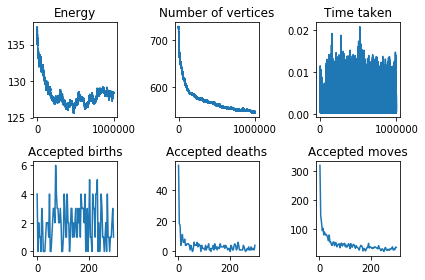

In [43]:

plt.subplot(2,3,1)
plt.title('Energy')
log['energy'].plot()

plt.subplot(2,3,2)
plt.title('Number of vertices')
log['no_act_vrt'].plot()

plt.subplot(2,3,3)
plt.title('Time taken')
log['time'].plot()

plt.subplot(2,3,4)
plt.title('Accepted births')
groupedlog[groupedlog['type'] == 'B']['accept'].plot()

plt.subplot(2,3,5)
plt.title('Accepted deaths')
groupedlog[groupedlog['type'] == 'D']['accept'].plot()

plt.subplot(2,3,6)
plt.title('Accepted moves')
groupedlog[groupedlog['type'] == 'M']['accept'].plot()


plt.tight_layout()
# plt.show()

plt.savefig('foo.pdf')

In [ ]:
xx